# **CSE422: Artificial Intelligence**

# **Project Name: Dry Bean Classification**

## **Section: 11**

## **Group: 14**

## **Group Members:**

### **Shah Samiur Rahman (ID: 21201492)**

### **Sarker Md Talha (ID: 21201508)**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score


# **Dataset Load**

In [3]:
path='/content/drive/MyDrive/Dry_Bean.csv'

# **Data Visualization**

In [4]:
bean=pd.read_csv(path)
bean

,Area,Perimeter,Weight,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,NaN,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,NaN,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,NaN,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,NaN,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,NaN,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,NaN,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,NaN,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,NaN,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,NaN,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [5]:
print("Shape of the dataset:",bean.shape)
print("Number of rows of the dataset:",bean.shape[0])
print("Number of columns of the dataset:",bean.shape[1])

Shape of the dataset: (13611, 18)
Number of rows of the dataset: 13611
Number of columns of the dataset: 18


In [6]:
print("Count of each category:\n", bean["Class"].value_counts())


Count of each category:
 Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64


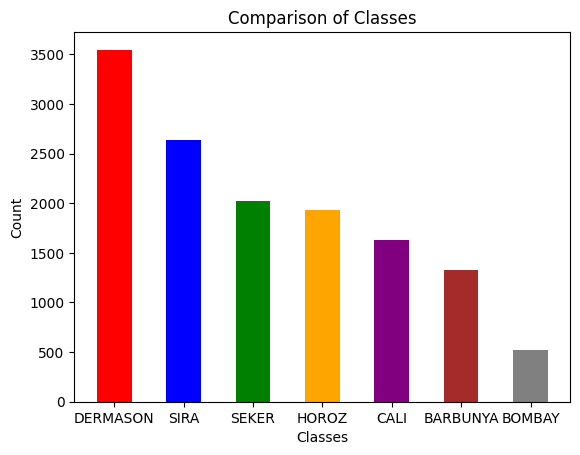

In [7]:
class_labels = ['DERMASON', 'SIRA', 'SEKER', 'HOROZ', 'CALI', 'BARBUNYA', 'BOMBAY']
label_count = [3546, 2636, 2027, 1928, 1630, 1322, 522]

plt.bar(class_labels, label_count, color=['red', 'blue', 'green', 'orange', 'purple', 'brown', 'grey'], width=0.5)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Comparison of Classes')
plt.show()

In [8]:
print("Information about the dataset:")
bean.info()

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   Weight           0 non-null      float64
 3   MajorAxisLength  13611 non-null  float64
 4   MinorAxisLength  13611 non-null  float64
 5   AspectRation     13611 non-null  float64
 6   Eccentricity     13611 non-null  float64
 7   ConvexArea       13611 non-null  int64  
 8   EquivDiameter    13611 non-null  float64
 9   Extent           13611 non-null  float64
 10  Solidity         13611 non-null  float64
 11  roundness        13611 non-null  float64
 12  Compactness      13611 non-null  float64
 13  ShapeFactor1     13611 non-null  float64
 14  ShapeFactor2     13605 non-null  float64
 15  ShapeFactor3     13611 non-null  float64
 16  ShapeFactor4     13611 non-

In [9]:
print("Data Description:")
bean.describe()

Data Description:


,Area,Perimeter,Weight,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,0.0,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13605.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,NaN,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,NaN,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,NaN,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,NaN,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001153,0.581359,0.993703
50%,44652.000000,794.941000,NaN,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,NaN,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,NaN,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [10]:
corr_data=bean.drop(["Class"], axis=1)
print("Correlation of the all the features:")
corr_data.corr()

Correlation of the all the features:


,Area,Perimeter,Weight,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.966722,NaN,0.931834,0.951602,0.241735,0.267481,0.999939,0.984968,0.054345,-0.196585,-0.357530,-0.268067,-0.847958,-0.639216,-0.272145,-0.355721
Perimeter,0.966722,1.000000,NaN,0.977338,0.913179,0.385276,0.391066,0.967689,0.991380,-0.021160,-0.303970,-0.547647,-0.406857,-0.864623,-0.767572,-0.408435,-0.429310
Weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MajorAxisLength,0.931834,0.977338,NaN,1.000000,0.826052,0.550335,0.541972,0.932607,0.961733,-0.078062,-0.284302,-0.596358,-0.568377,-0.773609,-0.859256,-0.568185,-0.482527
MinorAxisLength,0.951602,0.913179,NaN,0.826052,1.000000,-0.009161,0.019574,0.951339,0.948539,0.145957,-0.155831,-0.210344,-0.015066,-0.947204,-0.471199,-0.019326,-0.263749
AspectRation,0.241735,0.385276,NaN,0.550335,-0.009161,1.000000,0.924293,0.243301,0.303647,-0.370184,-0.267754,-0.766979,-0.987687,0.024593,-0.837876,-0.978592,-0.449264
Eccentricity,0.267481,0.391066,NaN,0.541972,0.019574,0.924293,1.000000,0.269255,0.318667,-0.319362,-0.297592,-0.722272,-0.970313,0.019920,-0.860187,-0.981058,-0.449354
ConvexArea,0.999939,0.967689,NaN,0.932607,0.951339,0.243301,0.269255,1.000000,0.985226,0.052564,-0.206191,-0.362083,-0.269922,-0.847950,-0.640789,-0.274024,-0.362049
EquivDiameter,0.984968,0.991380,NaN,0.961733,0.948539,0.303647,0.318667,0.985226,1.000000,0.028383,-0.231648,-0.435945,-0.327650,-0.892741,-0.713028,-0.330389,-0.392512
Extent,0.054345,-0.021160,NaN,-0.078062,0.145957,-0.370184,-0.319362,0.052564,0.028383,1.000000,0.191389,0.344411,0.354212,-0.141616,0.238215,0.347624,0.148502


<Axes: >

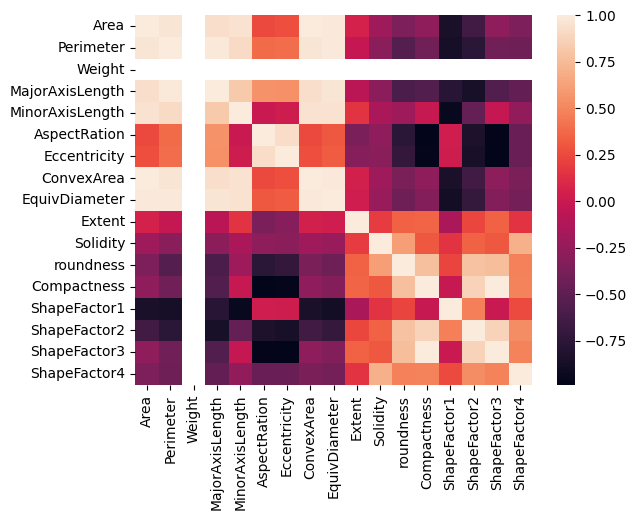

In [11]:
sns.heatmap(corr_data.corr())

# **Data pre-processing**

In [12]:
# Checking for null values

bean.isnull().sum()

Area                   0
Perimeter              0
Weight             13611
MajorAxisLength        0
MinorAxisLength        0
AspectRation           0
Eccentricity           0
ConvexArea             0
EquivDiameter          0
Extent                 0
Solidity               0
roundness              0
Compactness            0
ShapeFactor1           0
ShapeFactor2           6
ShapeFactor3           0
ShapeFactor4           0
Class                  0
dtype: int64

In [13]:
#Dropping Weight Column

bean=bean.drop(["Weight"], axis=1)

In [14]:
null_rows=bean[bean.isnull().any(axis=1)]
print(null_rows)

         Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
1947    49680    819.726       278.002825       227.997129      1.219326   
3008    76074   1094.850       390.428746       250.458058      1.558859   
3508   160273   1550.026       599.079539       343.574712      1.743666   
3993    63139    971.167       378.936577       214.342829      1.767899   
9346    47397    808.959       298.943852       202.477338      1.476431   
10862   28159    624.440       237.953360       151.322781      1.572489   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
1947       0.572184       50264     251.504554  0.749253  0.988381   0.929082   
3008       0.767127       77592     311.224075  0.820470  0.980436   0.797511   
3508       0.819203      163513     451.736562  0.808871  0.980185   0.838286   
3993       0.824650       64207     283.533193  0.714630  0.983366   0.841240   
9346       0.735699       47836     245.657759  0.713059  0.99

In [15]:
#Imputing Null values
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='mean') #mode

impute.fit(bean[['ShapeFactor2']])

bean['ShapeFactor2'] = impute.transform(bean[['ShapeFactor2']])

In [16]:
#Checking again for null values

bean.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [17]:
bean.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


Now, there is no column with null value.

# **Feature Engeneering** (Label Encoding)

In [18]:
bean["Class"].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [19]:
from sklearn.preprocessing import LabelEncoder

l_enc=LabelEncoder()
bean["Encoded_Class"]=l_enc.fit_transform(bean["Class"])

encoded_values = l_enc.fit_transform(bean["Class"])

# Create a dictionary to map original class labels to encoded values
label_map = {label: encoded for label, encoded in zip(bean["Class"], encoded_values)}

# Display the mapping
print("Class Label  : Encoded Value")
for label, encoded_value in label_map.items():
    print(f"{label:12} : {encoded_value}")

Class Label  : Encoded Value
SEKER        : 5
BARBUNYA     : 0
BOMBAY       : 1
CALI         : 2
HOROZ        : 4
SIRA         : 6
DERMASON     : 3


Updated dataset with label encoded values

In [20]:
bean=bean.drop(["Class"], axis=1)
bean

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Encoded_Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,3
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,3
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,3
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,3


# **Data Splitting**

In [21]:
data_x=bean.drop(['Encoded_Class'],axis=1)
data_y=bean['Encoded_Class']

In [22]:
data_x

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [23]:
data_y

0        5
1        5
2        5
3        5
4        5
        ..
13606    3
13607    3
13608    3
13609    3
13610    3
Name: Encoded_Class, Length: 13611, dtype: int64

Splitting the dataset into training set and test set by 70:30 distribution

In [24]:
x_train, x_test, y_train, y_test= train_test_split(data_x, data_y, test_size= 0.3, random_state=0)

In [25]:
print("After splitting: ")
print("Training Data:: ", x_train.shape, y_train.shape)
print("Test Data: ", x_test.shape, y_test.shape)

After splitting: 
Training Data::  (9527, 16) (9527,)
Test Data:  (4084, 16) (4084,)


*Feature Scaling(Standard Scaler)*

In [26]:
features=["Area",	"Perimeter",	"MajorAxisLength",	"MinorAxisLength",	"AspectRation",	"Eccentricity",	"ConvexArea",	"EquivDiameter",	"Extent",	"Solidity",	"roundness",	"Compactness",	"ShapeFactor1",	"ShapeFactor2",	"ShapeFactor3",	"ShapeFactor4"]

standard_scaler = preprocessing.StandardScaler()
standard_scaler.fit(x_train[features])
x_train[features] = standard_scaler.transform(x_train[features])


In [27]:
print("Minimum value per feature after scaling:\n {}".format(x_train.min(axis=0)))
print()
print("Maximum value per feature after scaling:\n {}".format(x_train.max(axis=0)))

Minimum value per feature after scaling:
 Area               -1.104795
Perimeter          -1.530719
MajorAxisLength    -1.582322
MinorAxisLength    -1.757484
AspectRation       -2.182440
Eccentricity       -5.080160
ConvexArea         -1.103437
EquivDiameter      -1.539017
Extent             -3.984067
Solidity          -14.665727
roundness          -6.417466
Compactness        -2.577863
ShapeFactor1       -3.317142
ShapeFactor2       -1.925869
ShapeFactor3       -2.353529
ShapeFactor4      -11.087166
dtype: float64

Maximum value per feature after scaling:
 Area               6.756437
Perimeter          5.199060
MajorAxisLength    4.827342
MinorAxisLength    5.638074
AspectRation       3.427208
Eccentricity       1.743947
ConvexArea         6.917870
EquivDiameter      5.263067
Extent             2.367920
Solidity           1.616094
roundness          1.957996
Compactness        2.893486
ShapeFactor1       3.424981
ShapeFactor2       3.255606
ShapeFactor3       3.170852
ShapeFactor4    

In [28]:
x_test[features] = standard_scaler.transform(x_test[features])

In [29]:
x_train

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
10704,-0.867477,-1.097011,-1.012066,-1.129155,-0.166110,0.114156,-0.869686,-1.108311,-0.392025,0.719465,0.474973,0.043763,1.689353,0.762829,0.005128,-0.381249
13145,-0.516502,-0.545925,-0.643150,-0.441786,-0.529171,-0.277590,-0.512991,-0.563006,0.182259,-0.561841,0.014019,0.473869,0.377238,0.540215,0.442756,0.827881
2571,0.481778,0.863923,0.553235,0.688603,-0.033310,0.237037,0.496314,0.666309,-0.856532,-1.538724,-1.569001,-0.061360,-0.973098,-0.610162,-0.099662,0.740884
4683,0.719196,0.929546,0.983230,0.783986,0.481505,0.635461,0.745673,0.915595,0.014991,-2.433763,-0.591829,-0.646572,-0.988001,-0.999885,-0.667425,-2.802863
12624,-0.611697,-0.754582,-0.767550,-0.575592,-0.572916,-0.331290,-0.612589,-0.702560,0.319181,0.225404,0.746387,0.509864,0.603122,0.703862,0.480028,0.333303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,-0.520328,-0.628859,-0.665379,-0.424337,-0.597072,-0.361629,-0.521291,-0.568513,-0.513582,0.188671,0.707307,0.551646,0.351003,0.605164,0.523419,0.811860
3264,1.092829,1.359434,1.118123,1.313148,0.029031,0.291527,1.095655,1.285116,-0.728398,-0.448479,-1.007525,-0.132697,-1.486640,-0.896911,-0.170287,0.421450
9845,-0.073922,-0.065277,-0.051826,0.093484,-0.221612,0.059854,-0.079350,0.026081,1.270937,0.579463,0.518800,0.108748,-0.324571,-0.165656,0.070333,-0.138313
10799,-0.854252,-1.044325,-0.938143,-1.188675,0.122113,0.369379,-0.855037,-1.086046,0.162428,0.376492,0.141211,-0.212931,1.785917,0.527123,-0.249251,0.842044


In [30]:
x_test

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
13027,-0.538958,-0.676237,-0.645116,-0.502666,-0.442350,-0.175514,-0.541297,-0.595443,1.070408,0.433704,0.922702,0.363803,0.483333,0.486583,0.329406,0.407457
11035,-0.818738,-1.005079,-0.932881,-1.067793,-0.099414,0.177070,-0.816282,-1.027024,0.731926,-0.366071,0.295239,0.001313,1.523977,0.635912,-0.037290,0.571608
13205,-0.504955,-0.631568,-0.579818,-0.487343,-0.338793,-0.061028,-0.510842,-0.546438,0.196142,1.003714,0.917960,0.261485,0.448018,0.365997,0.224872,0.825048
7578,-0.526740,-0.527210,-0.419741,-0.723154,0.375315,0.562056,-0.527144,-0.577758,-0.124966,0.097417,-0.261645,-0.488206,0.878728,-0.131778,-0.516390,-0.477353
1961,-0.106113,-0.128989,-0.048733,-0.010768,-0.071034,0.203099,-0.115955,-0.013986,-1.268102,1.163600,0.734319,-0.024950,-0.216021,-0.223084,-0.063465,0.671998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874,-0.205538,-0.300294,-0.502517,0.316125,-1.236767,-1.397855,-0.211122,-0.140221,-0.010664,0.686559,1.215980,1.362976,-0.599949,0.837368,1.392689,0.810615
1067,-0.466185,-0.606601,-0.717613,-0.177256,-1.026867,-0.999207,-0.468053,-0.491349,0.058854,0.308859,1.148094,1.076655,0.000392,0.946809,1.080118,0.672455
1115,-0.455376,-0.610844,-0.799603,-0.024867,-1.354376,-1.655534,-0.460845,-0.476135,0.705952,0.881778,1.317064,1.530744,-0.203173,1.313272,1.578779,0.875521
13228,-0.498879,-0.602698,-0.630093,-0.400449,-0.564387,-0.320696,-0.501914,-0.537751,1.154158,0.521783,0.723380,0.508880,0.319346,0.543492,0.479008,0.640449


# **Feature Selection**



In [31]:
drop_column=["Extent","Solidity"]
bean=bean.drop(drop_column, axis=1)
bean.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Encoded_Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5


In [32]:
bean_corr = bean.corr()
bean_corr

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Encoded_Class
Area,1.000000,0.966722,0.931834,0.951602,0.241735,0.267481,0.999939,0.984968,-0.357530,-0.268067,-0.847958,-0.638867,-0.272145,-0.355721,-0.475252
Perimeter,0.966722,1.000000,0.977338,0.913179,0.385276,0.391066,0.967689,0.991380,-0.547647,-0.406857,-0.864623,-0.767198,-0.408435,-0.429310,-0.507638
MajorAxisLength,0.931834,0.977338,1.000000,0.826052,0.550335,0.541972,0.932607,0.961733,-0.596358,-0.568377,-0.773609,-0.858847,-0.568185,-0.482527,-0.455175
MinorAxisLength,0.951602,0.913179,0.826052,1.000000,-0.009161,0.019574,0.951339,0.948539,-0.210344,-0.015066,-0.947204,-0.470979,-0.019326,-0.263749,-0.458492
AspectRation,0.241735,0.385276,0.550335,-0.009161,1.000000,0.924293,0.243301,0.303647,-0.766979,-0.987687,0.024593,-0.837772,-0.978592,-0.449264,-0.116332
Eccentricity,0.267481,0.391066,0.541972,0.019574,0.924293,1.000000,0.269255,0.318667,-0.722272,-0.970313,0.019920,-0.860027,-0.981058,-0.449354,-0.200356
ConvexArea,0.999939,0.967689,0.932607,0.951339,0.243301,0.269255,1.000000,0.985226,-0.362083,-0.269922,-0.847950,-0.640433,-0.274024,-0.362049,-0.477459
EquivDiameter,0.984968,0.991380,0.961733,0.948539,0.303647,0.318667,0.985226,1.000000,-0.435945,-0.327650,-0.892741,-0.712669,-0.330389,-0.392512,-0.481099
roundness,-0.357530,-0.547647,-0.596358,-0.210344,-0.766979,-0.722272,-0.362083,-0.435945,1.000000,0.768086,0.230273,0.782706,0.763126,0.472149,0.384972
Compactness,-0.268067,-0.406857,-0.568377,-0.015066,-0.987687,-0.970313,-0.269922,-0.327650,0.768086,1.000000,-0.009394,0.868841,0.998686,0.484436,0.156204


<Axes: >

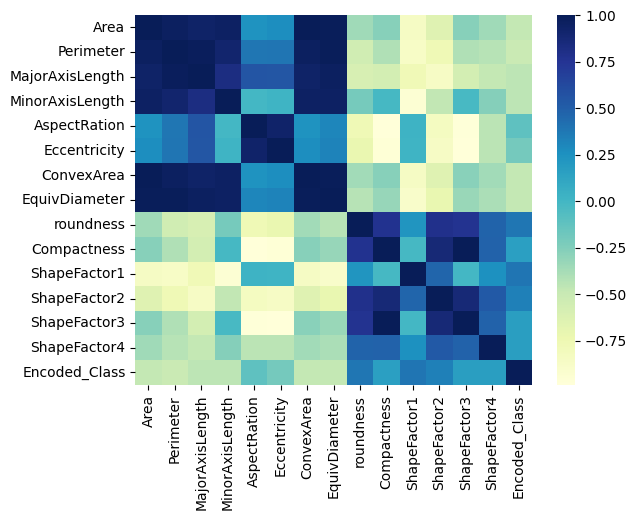

In [33]:
sns.heatmap(bean.corr(), cmap="YlGnBu")

# **Dataset Training**

Decision Tree Model

In [34]:
# Training and Accuracy
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dec_tree= tree.DecisionTreeClassifier()
dec_tree = dec_tree.fit(x_train, y_train)
accuracy = dec_tree.score(x_train, y_train)
print(f"Accuracy of the model: {round(accuracy*100, 2)}%")

Accuracy of the model: 100.0%


K-Nearest Neighbors Model



In [35]:
# Training and Accuracy
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
accuracy=knn.score(x_train, y_train)
print(f"Accuracy of the model: {round(accuracy*100, 2)}%")

Accuracy of the model: 94.29%


Naive Bayes Classifier Model

In [36]:
# Training and Accuracy
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train, y_train)
accuracy=nb.score(x_train, y_train)
print(f"Accuracy of the model: {round(accuracy*100, 2)}%")

Accuracy of the model: 89.79%


Random Forest Classifier

In [37]:
# Training and Accuracy
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
accuracy=rf.score(x_train, y_train)
print(f"Accuracy of the model: {round(accuracy*100, 2)}%")

Accuracy of the model: 100.0%


# **Dataset Testing**

Decision Tree Model

In [38]:
# Test Accuracy of DT
accuracy=dec_tree.score(x_test, y_test)
print(f"Accuracy of the model: {round(accuracy*100, 2)}%")

Accuracy of the model: 89.67%


K-Nearest Neighbors Model

In [39]:
# Test Accuracy of KNN
accuracy=knn.score(x_test, y_test)
print(f"Accuracy of the model: {round(accuracy*100, 2)}%")

Accuracy of the model: 92.7%


Naive Bayes Classifier Model

In [40]:
# Test accuracy of NB
accuracy=nb.score(x_test, y_test)
print(f"Accuracy of the model: {round(accuracy*100, 2)}%")

Accuracy of the model: 89.76%


Random Forest Classifier

In [41]:
# Test accuracy of RF
accuracy=rf.score(x_test, y_test)
print(f"Accuracy of the model: {round(accuracy*100, 2)}%")

Accuracy of the model: 92.43%


# **Analysing the results**

In [42]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Decision Tree Model

In [43]:
d_pred = dec_tree.predict(x_test)
print(classification_report(y_test, d_pred))

accuracy = accuracy_score(y_test, d_pred)
print("Accuracy Score:", accuracy)

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       389
           1       1.00      1.00      1.00       134
           2       0.92      0.91      0.91       501
           3       0.90      0.90      0.90      1057
           4       0.92      0.93      0.92       594
           5       0.91      0.92      0.92       579
           6       0.84      0.83      0.84       830

    accuracy                           0.90      4084
   macro avg       0.91      0.91      0.91      4084
weighted avg       0.90      0.90      0.90      4084

Accuracy Score: 0.8966699314397649


In [56]:
print("Confusion matrix:")
dt_conf_matrix = confusion_matrix(d_pred, y_test)
print(dt_conf_matrix)

Confusion matrix:
[[351   0  30   0   4   5   6]
 [  0 134   0   0   0   0   0]
 [ 17   0 455   0  19   0   6]
 [  0   0   0 949   4  13  94]
 [  4   0  13  11 550   0  18]
 [ 10   0   1  23   0 533  16]
 [  7   0   2  74  17  28 690]]


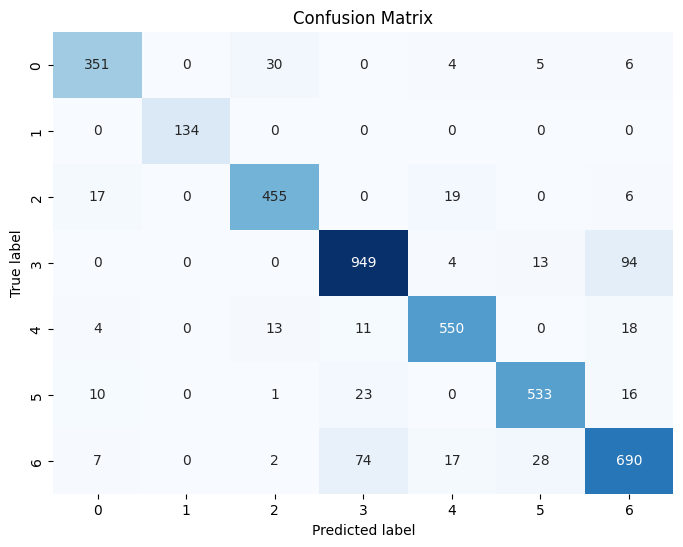

In [57]:
plt.figure(figsize=(8, 6))
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


K-Nearest Neighbors Model

In [45]:
kpredicted = knn.predict(x_test)
print(classification_report(y_test, kpredicted))

accuracy = accuracy_score(y_test, kpredicted)
print("Accuracy Score:", accuracy)

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       389
           1       1.00      1.00      1.00       134
           2       0.93      0.96      0.94       501
           3       0.91      0.94      0.92      1057
           4       0.96      0.97      0.96       594
           5       0.94      0.95      0.95       579
           6       0.89      0.86      0.87       830

    accuracy                           0.93      4084
   macro avg       0.94      0.94      0.94      4084
weighted avg       0.93      0.93      0.93      4084

Accuracy Score: 0.9270323212536729


In [58]:
print("Confusion matrix:")
knn_conf_matrix = confusion_matrix(kpredicted, y_test)
print(knn_conf_matrix)

Confusion matrix:
[[346   0   9   0   0   6   2]
 [  0 134   0   0   0   0   0]
 [ 27   0 479   0   8   0   3]
 [  0   0   0 991   2   7  89]
 [  2   0   6   1 575   0  15]
 [  3   0   2  19   0 548   8]
 [ 11   0   5  46   9  18 713]]


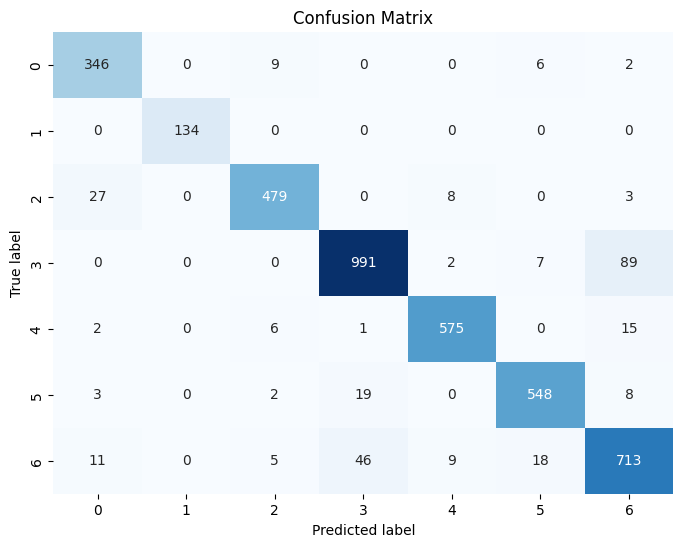

In [59]:
plt.figure(figsize=(8, 6))
sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


Naive Bayes Classifier Model

In [47]:
nb_pred = nb.predict(x_test)
print(classification_report(y_test, nb_pred))

accuracy = accuracy_score(y_test, nb_pred)
print("Accuracy Score:", accuracy)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       389
           1       0.99      1.00      1.00       134
           2       0.87      0.89      0.88       501
           3       0.93      0.89      0.91      1057
           4       0.94      0.96      0.95       594
           5       0.93      0.93      0.93       579
           6       0.83      0.87      0.85       830

    accuracy                           0.90      4084
   macro avg       0.91      0.91      0.91      4084
weighted avg       0.90      0.90      0.90      4084

Accuracy Score: 0.8976493633692458


In [60]:
print("Confusion matrix:")
nb_conf_matrix = confusion_matrix(nb_pred, y_test)
print(nb_conf_matrix)

Confusion matrix:
[[314   0  47   0   0   6   4]
 [  0 134   1   0   0   0   0]
 [ 53   0 445   0  11   0   2]
 [  0   0   0 941   4   4  66]
 [  2   0   6   2 570   0  25]
 [  3   0   1  26   0 541  12]
 [ 17   0   1  88   9  28 721]]


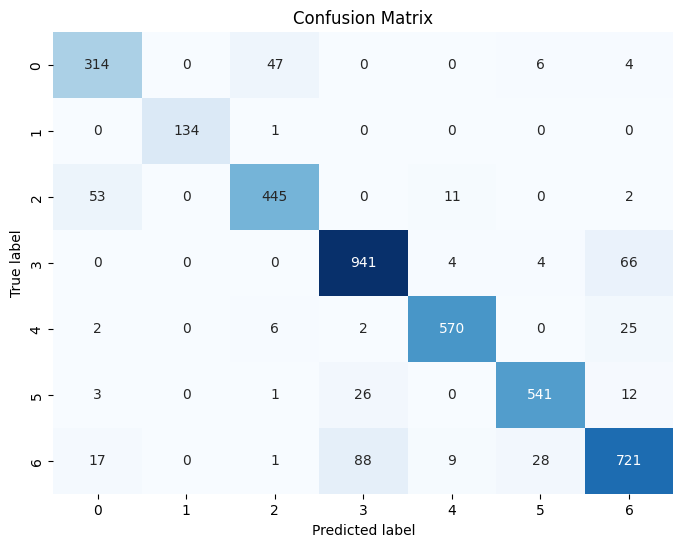

In [61]:
plt.figure(figsize=(8, 6))
sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


Random Forest Classifier

In [49]:
rf_pred = rf.predict(x_test)
print(classification_report(y_test, rf_pred))

accuracy = accuracy_score(y_test, rf_pred)
print("Accuracy Score:", accuracy)

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       389
           1       1.00      0.99      1.00       134
           2       0.93      0.94      0.93       501
           3       0.91      0.94      0.92      1057
           4       0.96      0.95      0.95       594
           5       0.94      0.96      0.95       579
           6       0.89      0.86      0.87       830

    accuracy                           0.92      4084
   macro avg       0.94      0.93      0.94      4084
weighted avg       0.92      0.92      0.92      4084

Accuracy Score: 0.9243388834476004


In [62]:
print("Confusion matrix:")
rf_conf_matrix = confusion_matrix(rf_pred, y_test)
print(rf_conf_matrix)

Confusion matrix:
[[351   1  17   0   1   3   2]
 [  0 133   0   0   0   0   0]
 [ 23   0 469   0  10   0   3]
 [  0   0   0 992   4   6  91]
 [  2   0   9   1 564   0  14]
 [  4   0   2  19   0 554   8]
 [  9   0   4  45  15  16 712]]


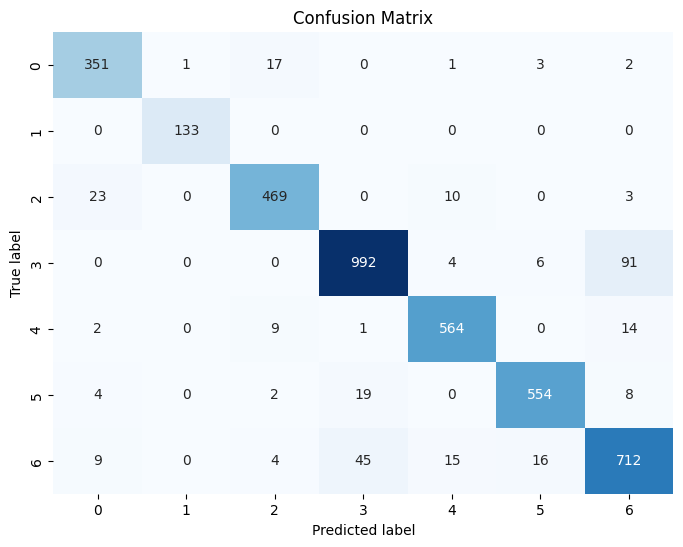

In [63]:
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


## **Accuracy Scores comparison of the Models**

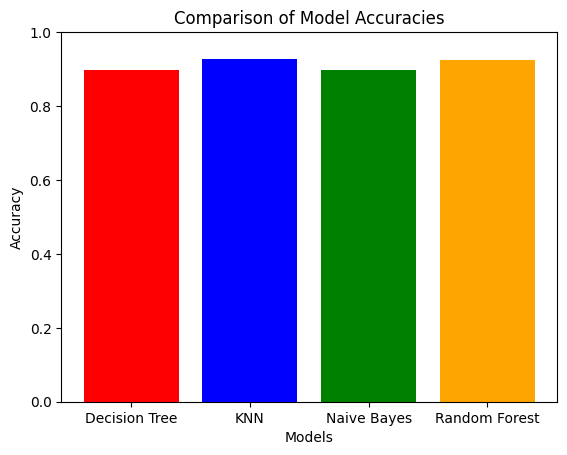

In [51]:
models = ['Decision Tree', 'KNN', 'Naive Bayes', 'Random Forest']
accuracy = [accuracy_score(y_test, d_pred), accuracy_score(y_test, kpredicted), accuracy_score(y_test, nb_pred), accuracy_score(y_test, rf_pred) ]

plt.bar(models, accuracy, color=['red', 'blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)
plt.show()
